The CIFAR-10 dataset is a dataset in the field of deep learning for image classification tasks. The goal is classifying images from the CIFAR-10 dataset into one of 10 classes.

Dataset Name: CIFAR-10 (Canadian Institute For Advanced Research - 10 classes)

Number of Images: 60,000 color images in total

*   50,000 training images
*   10,000 test images

Image Dimensions: Each image is 32x32 pixels with 3 color channels (RGB)

Number of Classes: 10 classes, which are mutually exclusive and collectively exhaustive.

The 10 classes are: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck



**Data loarding and inspection**

load the CIFAR-10 dataset using TensorFlow and Keras, and then proceed with inspecting, visualizing, and cleaning the data.

CIFAR-10 images are in the shape (32, 32, 3) with pixel values ranging from 0 to 255.

Labels are integers ranging from 0 to 9 representing the 10 classes.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Inspect shapes
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


**Data Visualization**

Display some sample images from the dataset.

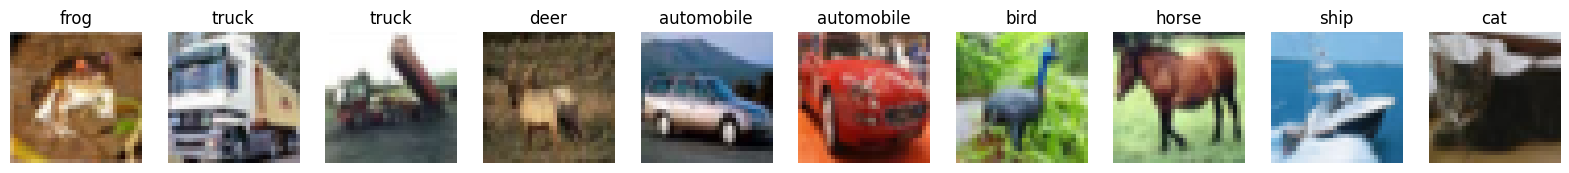

In [ ]:
# Helper function to plot images
def plot_images(images, labels, class_names):
    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    for i, (image, label) in enumerate(zip(images, labels)):
        axes[i].imshow(image.astype('uint8'))
        axes[i].axis('off')
        axes[i].set_title(class_names[label[0]])
    plt.show()

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot first 10 images from the training set
plot_images(x_train[:10], y_train[:10], class_names)

Use histograms to show pixel intensity distributions.


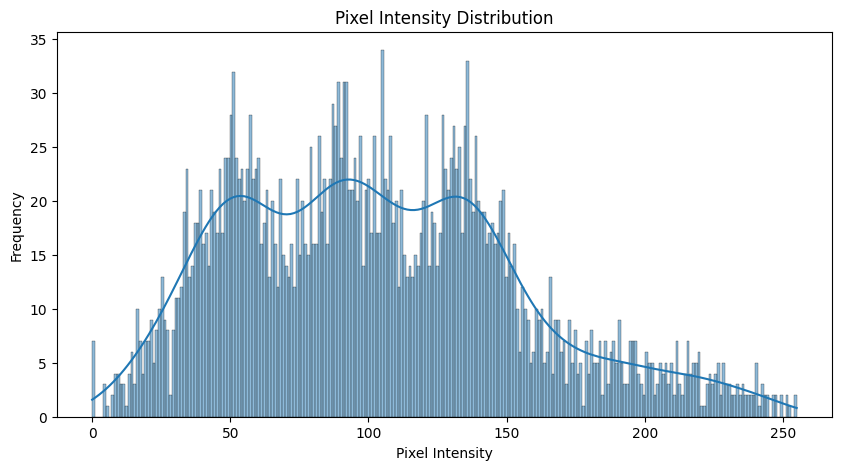

In [ ]:
# Flatten the first image for histogram plotting
flattened_image = x_train[0].flatten()

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(flattened_image, bins=256, kde=True)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

CIFAR-10 images are color images with RGB channels. Each pixel in an image is not correlated with pixels in other images.

**Data Transformation:**

Normalize pixel values to the range [0, 1] for better convergence of the neural network.

In [ ]:
# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

**Outliers and Data Cleaning:**

CIFAR-10 dataset is clean and doesn't have missing values or outliers in the traditional sense (there are no numerical values that can be missing or out of an expected range).

Each image is complete and of uniform size.

**Perform Analysis Using Deep Learning Models**

I'll use a Convolutional Neural Network (CNN) for image classification.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

**Model Training & Evaluation**

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2390 - loss: 2.0197 - val_accuracy: 0.4649 - val_loss: 1.4785
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4434 - loss: 1.5420 - val_accuracy: 0.5137 - val_loss: 1.3596
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5000 - loss: 1.3875 - val_accuracy: 0.5559 - val_loss: 1.2459
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5373 - loss: 1.3054 - val_accuracy: 0.6028 - val_loss: 1.1200
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5730 - loss: 1.2176 - val_accuracy: 0.6208 - val_loss: 1.0887
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5972 - loss: 1.1373 - val_accuracy: 0.6382 - val_loss: 1.0304
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6260 - loss: 1.0808 - val_accuracy: 0.6571 - val_loss: 0.9838
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6380 - loss: 1.0341 - val_accuracy: 0

**Hyperparameter optimization**

I'll use a manual grid search here, and perform the grid search over some hyperparameters such as the learning rate, dropout rate, and batch size.

In [ ]:
# Function to create and compile the model
def create_model(dropout_rate=0.5, learning_rate=0.001):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameters to tune
param_grid = {
    'dropout_rate': [0.3, 0.4, 0.5],
    'learning_rate': [0.0001, 0.001, 0.01],
    'batch_size': [32, 64, 128]
}

# Split the training data for cross-validation (if needed)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

best_accuracy = 0.0
best_params = {}

# Grid search
for dropout_rate in param_grid['dropout_rate']:
    for learning_rate in param_grid['learning_rate']:
        for batch_size in param_grid['batch_size']:
            print(f"Training with dropout_rate={dropout_rate}, learning_rate={learning_rate}, batch_size={batch_size}")
            model = create_model(dropout_rate=dropout_rate, learning_rate=learning_rate)
            history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2, verbose=1)
            val_acc = max(history.history['val_accuracy'])
            print(f"Validation accuracy: {val_acc}")
            if val_acc > best_accuracy:
                best_accuracy = val_acc
                best_params = {'dropout_rate': dropout_rate, 'learning_rate': learning_rate, 'batch_size': batch_size}

print(f"Best parameters found: {best_params}")
print(f"Best validation accuracy: {best_accuracy}")

Training with dropout_rate=0.3, learning_rate=0.0001, batch_size=32
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2151 - loss: 2.1113 - val_accuracy: 0.4114 - val_loss: 1.6622
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3865 - loss: 1.6756 - val_accuracy: 0.4581 - val_loss: 1.5103
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4377 - loss: 1.5395 - val_accuracy: 0.5006 - val_loss: 1.4074
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4745 - loss: 1.4551 - val_accuracy: 0.5209 - val_loss: 1.3487
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4995 - loss: 1.3947 - val_accuracy: 0.5339 - val_loss: 1.3135
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5164 - loss: 1.3576 - val_accuracy: 0.5469 - val_loss: 1.2778
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5315 - loss: 1.3129 - val_accuracy: 0.5625 - val_loss: 1.2427
Epoch 8/20
1250/1250 ━

In [ ]:
# Train the final model with the best parameters
best_model = create_model(**best_params)
best_model.fit(x_train, y_train, epochs=20, batch_size=best_params['batch_size'], validation_split=0.2, verbose=1)

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

**Concludtion**

**CNN Model Analysis:**

Model Complexity:

Total Parameters: 122,570 parameters (approximately 478.79 KB). This indicates a relatively small model, which is typical for simpler architectures or those designed to avoid overfitting, especially on smaller datasets.


Trainable Parameters: All 122,570 parameters are trainable, meaning there are no frozen layers in the model.


Non-trainable Parameters: There are no non-trainable parameters, suggesting that all layers in the model are active and contributing to the learning process.


Performance Metrics:

Test Accuracy: 71.30%. This accuracy is a reasonable baseline but indicates room for improvement, as state-of-the-art models can achieve significantly higher accuracy on the CIFAR-10 dataset.


**Hyperparameter Optimization Analysis:**

Best Parameters:

Dropout Rate: 0.4. Dropout is a regularization technique used to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time. A dropout rate of 0.4 means that 40% of the neurons are dropped out during training, which is a common value to use.

Learning Rate: 0.001. The learning rate controls how much to adjust the weights of the network with respect to the loss gradient. A value of 0.001 is typical and indicates a careful balance between rapid convergence and avoiding divergence or local minima.

Batch Size: 64. The batch size determines the number of samples to work through before updating the model weights. A batch size of 64 is commonly used and strikes a balance between memory usage and the stability of gradient updates.


Best Validation Accuracy:

72.57%. This validation accuracy is slightly higher than the test accuracy, indicating that the model generalized somewhat well to the validation set but still has room for improvement. The difference between train and validation/test accuracies can hint at overfitting or underfitting, though without training accuracy numbers, it’s difficult to determine conclusively.

**Potential Areas for Improvement**


Model Architecture:
Consider deeper or more complex architectures, such as ResNet, DenseNet, or EfficientNet, which have shown improved performance on CIFAR-10.
Experiment with different types of layers (e.g., convolutional layers with various kernel sizes, batch normalization, advanced activation functions).


Data Augmentation:
Apply data augmentation techniques (e.g., rotations, flips, translations) to artificially expand the dataset and improve generalization.


Regularization:
Introduce or adjust other regularization techniques such as L2 regularization (weight decay) or early stopping.


Hyperparameter Tuning:
Further tune hyperparameters such as the learning rate schedule, optimizer type, momentum, or other advanced settings.


Training Process:
Monitor training and validation loss/accuracy curves to ensure proper convergence and detect overfitting/underfitting early.
Consider using techniques like learning rate annealing or cyclic learning rates to improve convergence.


Evaluation:
Ensure proper evaluation metrics and consider using cross-validation to get a more robust estimate of model performance.